In [0]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

In [21]:
! git clone https://github.com/yuridadt/play_with_keras.git

fatal: destination path 'play_with_keras' already exists and is not an empty directory.


In [0]:
img_width, img_height = 32, 32

train_data_dir = 'play_with_keras/data/isic_train'
validation_data_dir = 'play_with_keras/data/isic_test'

In [0]:
epochs = 4
batch_size = 4

In [24]:
#Image Generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (img_width, img_height), 
                                                 batch_size=10, shuffle=True,seed=42,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_data_dir,
                                            target_size=(img_width, img_height), 
                                            batch_size=32, shuffle=True,seed=42,
                                            class_mode = 'categorical')


Found 1255 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [25]:
test_set.classes #  classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  # Thi

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

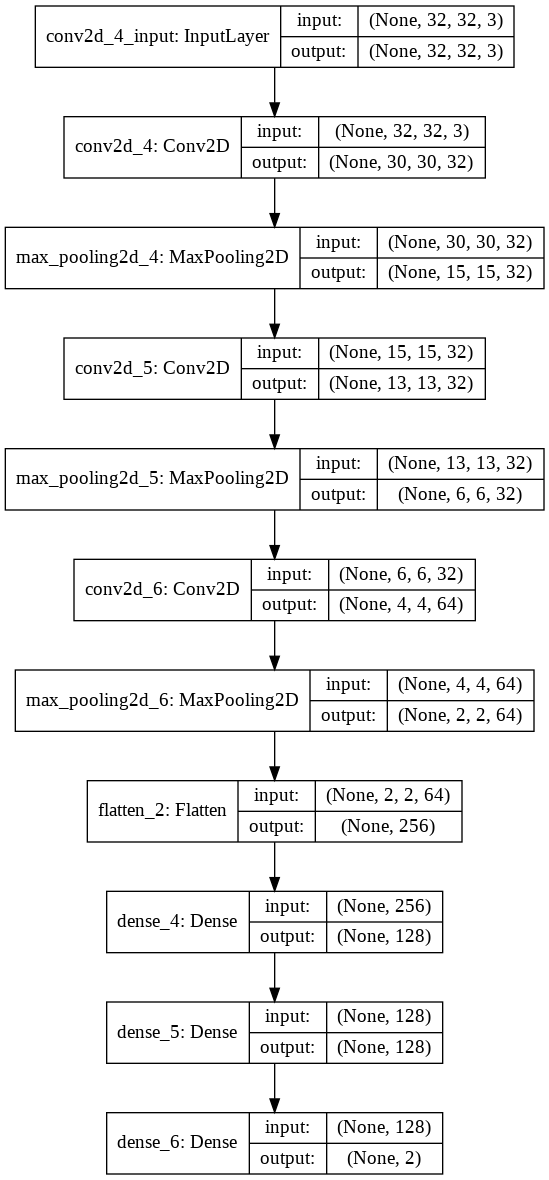

In [26]:
unet = Sequential()

unet.add(Convolution2D(32, 3, 3, input_shape = (img_width, img_height, 3), activation = "relu"))
unet.add(MaxPooling2D(pool_size=(2, 2)))
unet.add(Convolution2D(32, 3, 3,  activation = "relu"))
unet.add(MaxPooling2D(pool_size=(2, 2)))
unet.add(Convolution2D(64, 3, 3, activation = "relu"))
unet.add(MaxPooling2D(pool_size=(2, 2)))
unet.add(Flatten())
unet.add(Dense(output_dim = 128, activation = 'relu'))
unet.add(Dense(output_dim = 128, activation = 'relu'))
unet.add(Dense(output_dim = 2, activation = 'sigmoid'))

unet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

unet.summary()
from keras.utils import plot_model
plot_model(unet,show_shapes=True, show_layer_names = True, to_file='unit.png')


In [27]:
training_set.samples

1255

In [28]:
history=unet.fit_generator(training_set,
                         steps_per_epoch=training_set.samples//training_set.batch_size,
                         epochs=50, verbose=1,
                         validation_data= test_set, 
                         validation_steps=test_set.samples//test_set.batch_size)

Epoch 1/50
125/125 [==============================] - 19s 156ms/step - loss: 0.6931 - acc: 0.5384 - val_loss: 0.6997 - val_acc: 0.5026
Epoch 2/50
125/125 [==============================] - 20s 157ms/step - loss: 0.6654 - acc: 0.6096 - val_loss: 0.5534 - val_acc: 0.7636
Epoch 3/50
125/125 [==============================] - 19s 155ms/step - loss: 0.6213 - acc: 0.6752 - val_loss: 0.4837 - val_acc: 0.8016
Epoch 4/50
125/125 [==============================] - 20s 161ms/step - loss: 0.6269 - acc: 0.6456 - val_loss: 0.6933 - val_acc: 0.5897
Epoch 5/50
125/125 [==============================] - 19s 156ms/step - loss: 0.6580 - acc: 0.6504 - val_loss: 0.4335 - val_acc: 0.8859
Epoch 6/50
125/125 [==============================] - 19s 153ms/step - loss: 0.5792 - acc: 0.7192 - val_loss: 0.4379 - val_acc: 0.8723
Epoch 7/50
125/125 [==============================] - 19s 155ms/step - loss: 0.4865 - acc: 0.7672 - val_loss: 0.2762 - val_acc: 0.8886
Epoch 8/50
125/125 [==============================] - 1

Text(0.5, 1.0, 'Accuracy Curves')

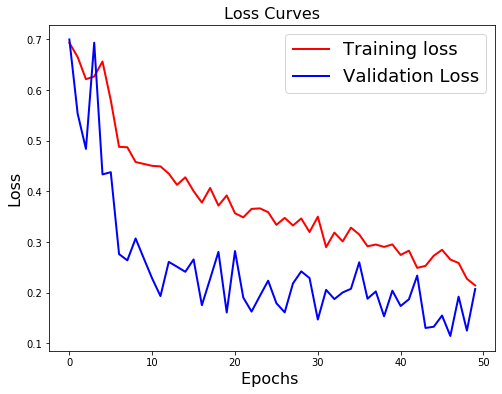

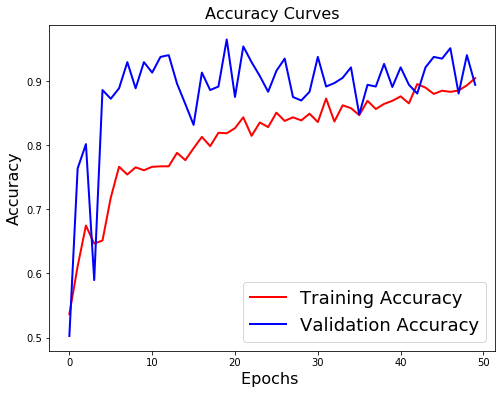

In [29]:
# Get training and test loss histories
import matplotlib.pyplot as plt
import numpy as np
# Set random seed
np.random.seed(0)

training_loss = history.history['loss']
test_loss = history.history['val_loss']# Get training and test loss histories
import matplotlib.pyplot as plt
import numpy as np
# Set random seed
np.random.seed(0)

training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=2.0)
plt.plot(history.history['val_acc'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [30]:
test_set.reset()
pred = unet.predict_generator(test_set, steps=test_set.samples/test_set.batch_size,verbose=1)
predict= np.argmax(pred, axis=1)

print((predict))

13/12 [===============================] - 4s 340ms/step
[0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0]


In [31]:
print('Classification Report')
target_names = ['class1', 'class2']
print(classification_report(test_set.classes, predict, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      class1       0.54      0.64      0.58       200
      class2       0.56      0.45      0.50       200

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.54       400
weighted avg       0.55      0.55      0.54       400



In [32]:
(test_set.classes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [34]:
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, predict)
print(cm)

Confusion Matrix
[[128  72]
 [110  90]]


In [35]:
predict

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,

Confusion matrix, without normalization
[[128  72]
 [110  90]]


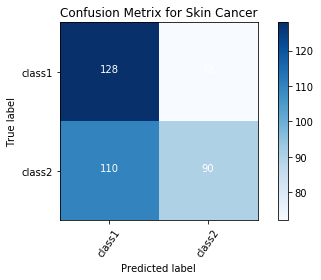

In [36]:
cm_plot_label = ['class1', 'class2']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

In [0]:
roc_log = roc_auc_score(test_set.classes, predict)
false_positive_rate, true_positive_rate, threshold = roc_curve(test_set.classes, predict)
area_under_curve = auc(false_positive_rate, true_positive_rate)

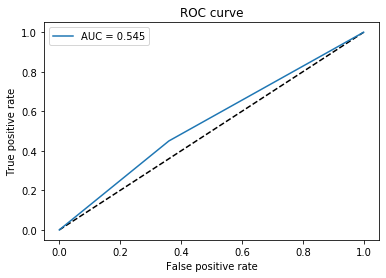

In [38]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()